[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Jonarod/Bootcamp-Inteligencia-Artificial-Women-Who-Code-Medellin/blob/master/semana%203/CNN%20clasificacion/Senales%20de%20transito/traffic_signs.ipynb)

In [1]:
# Importamos archivo 'kaggle.json' que toca bajar en kaggle.com en su propia cuenta (account > api keys > download api_key)
from google.colab import files
files.upload()

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!mkdir traffic_sign_dataset
%cd traffic_sign_dataset

/content/traffic_sign_dataset


In [ ]:
!kaggle datasets list -s gtsrb-german-traffic-sign

ref                                                                         title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign                     GTSRB - German Traffic Sign Recognition Benchmark  612MB  2018-11-25 18:12:34          54945        807  0.8235294        
datasets/valentynsichkar/traffic-signs-preprocessed                         Traffic Signs Preprocessed                           4GB  2019-08-31 18:22:11           7850        221  1.0              
datasets/eunjurho/german-traffic-sign-recognition-benchmark-cropped         german_traffic_sign_recognition_benchmark_cropped  206MB  2019-11-10 15:22:13            269          7  0.75             
datas

In [ ]:
!kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign  
%cd ..

 97% 591M/612M [00:05<00:00, 176MB/s]
100% 612M/612M [00:05<00:00, 114MB/s]
/content


In [ ]:
# Unzip archivos y borrar archivos inutiles
!unzip traffic_sign_dataset/gtsrb-german-traffic-sign.zip -d traffic_sign_dataset
!rm traffic_sign_dataset/gtsrb-german-traffic-sign.zip
!rm -rf traffic_sign_dataset/Meta
!rm -rf traffic_sign_dataset/meta
!rm -rf traffic_sign_dataset/test
!rm -rf traffic_sign_dataset/train
!rm traffic_sign_dataset/Meta.csv

Streaming output truncated to the last 5000 lines.
  inflating: traffic_sign_dataset/train/5/00005_00053_00010.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00011.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00012.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00013.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00014.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00015.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00016.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00017.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00018.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00019.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00020.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00021.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00022.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00023.png  
  inflating: traffic_sign

In [ ]:
!ls traffic_sign_dataset/Train

0   11	14  17	2   22	25  28	30  33	36  39	41  6  9
1   12	15  18	20  23	26  29	31  34	37  4	42  7
10  13	16  19	21  24	27  3	32  35	38  40	5   8


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import random
from PIL import Image
from sklearn.model_selection import  train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D

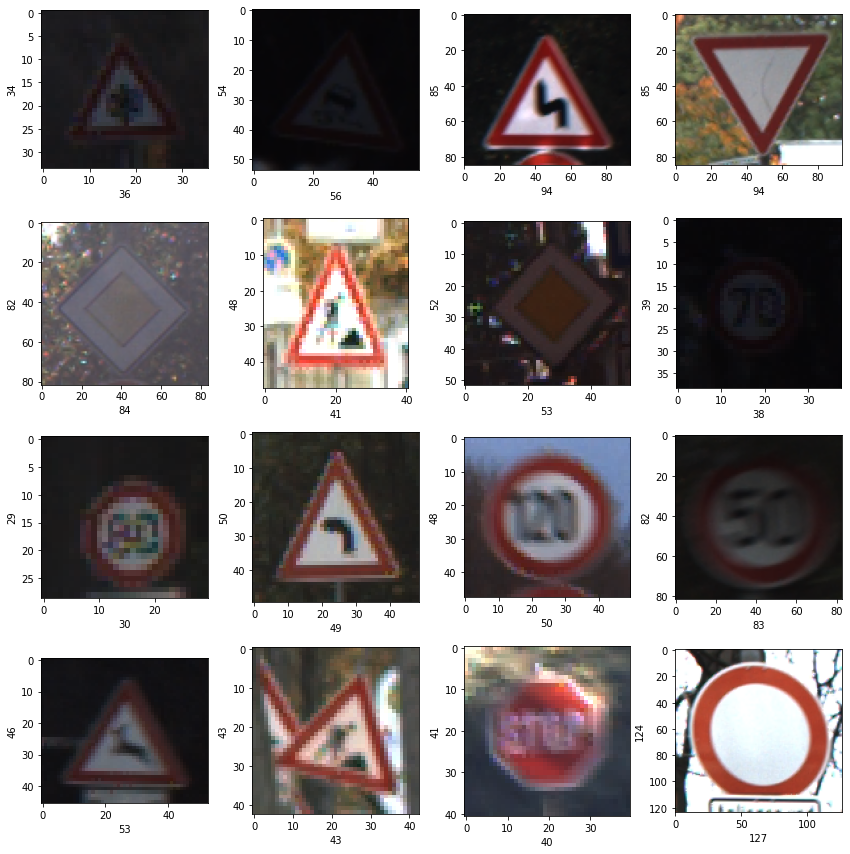

In [ ]:
plt.figure(figsize=(12,12))
path = "traffic_sign_dataset/Test"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10) #width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10) #height of image

In [ ]:
# Cada imagen viene con diferentes tamanos
# Pero tenemos que hacerlas iguales
# Entonces sacamos el promedio de las dimensiones
dim1 = []
dim2 = []

for i in range(0,43):
    labels = 'traffic_sign_dataset/Train' + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = imread(labels + '/' + x)
        dim1.append(img.shape[0])
        dim2.append(img.shape[1])

In [ ]:
print("Dimension 1 Mean : ",np.mean(dim1), " Dimension 2 Mean : ",np.mean(dim2))

Dimension 1 Mean :  50.328929582493814  Dimension 2 Mean :  50.83587951745773


In [ ]:
# Ahora re-dimensionamos las imagenes a 50x50 (50,50)
images = []
label_id = []

for i in range(43):
    labels = 'traffic_sign_dataset/Train' + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = Image.open(labels + '/' + x)
        img = img.resize((50,50))
        img = np.array(img)
        images.append(img)
        label_id.append(i)

In [ ]:
# Transformamos las imagenes a numpy array
images = np.array(images)
# Cada pixel esta representado por numero con un rango entre 0 y 255
# Entonces haremos la normalizacion de cada pixel dividiendo el valor por 255, lo que nos dara un numero entre 0 y 1.
# 0 siendo 0 y 1 siendo 255
images = images/255 

In [ ]:
label_id = np.array(label_id)
label_id.shape

(39209,)

In [ ]:
# Numero de clases
label_counts = pd.DataFrame(label_id).value_counts()
label_counts

2     2250
1     2220
13    2160
12    2100
38    2070
10    2010
4     1980
5     1860
25    1500
9     1470
7     1440
3     1410
8     1410
11    1320
35    1200
18    1200
17    1110
31     780
14     780
33     689
15     630
26     600
28     540
23     510
30     450
16     420
34     420
6      420
36     390
22     390
40     360
20     360
21     330
39     300
29     270
24     270
41     240
42     240
32     240
27     240
37     210
19     210
0      210
dtype: int64

In [ ]:
# Separacion de los datos entre set de entrenamiento y set de prueba
x_train, x_val, y_train, y_val = train_test_split(images, label_id , test_size = 0.2, random_state = 42)

In [ ]:
# Usemos Keras para encodificar los valores con "one-hot enconding" 
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)

In [ ]:
# Creamos una red neuronal
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = x_train.shape[1:], activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation = 'softmax'))

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 25, 25, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 11, 11, 64)        0

In [ ]:
model.fit(x_train, y_train, epochs = 10, batch_size = 128, validation_data = (x_val, y_val), verbose = 2)

Epoch 1/10
246/246 - 171s - loss: 2.5934 - accuracy: 0.2870 - val_loss: 1.3123 - val_accuracy: 0.6484 - 171s/epoch - 697ms/step
Epoch 2/10
246/246 - 173s - loss: 1.2958 - accuracy: 0.5930 - val_loss: 0.5878 - val_accuracy: 0.8766 - 173s/epoch - 704ms/step
Epoch 3/10
246/246 - 173s - loss: 0.8889 - accuracy: 0.7068 - val_loss: 0.3474 - val_accuracy: 0.9253 - 173s/epoch - 703ms/step
Epoch 4/10
246/246 - 172s - loss: 0.7185 - accuracy: 0.7612 - val_loss: 0.2597 - val_accuracy: 0.9554 - 172s/epoch - 700ms/step
Epoch 5/10
246/246 - 172s - loss: 0.6129 - accuracy: 0.7962 - val_loss: 0.1894 - val_accuracy: 0.9657 - 172s/epoch - 698ms/step
Epoch 6/10
246/246 - 172s - loss: 0.5453 - accuracy: 0.8200 - val_loss: 0.1611 - val_accuracy: 0.9723 - 172s/epoch - 697ms/step
Epoch 7/10
246/246 - 171s - loss: 0.4914 - accuracy: 0.8359 - val_loss: 0.1296 - val_accuracy: 0.9799 - 171s/epoch - 696ms/step
Epoch 8/10
246/246 - 171s - loss: 0.4622 - accuracy: 0.8447 - val_loss: 0.1194 - val_accuracy: 0.9821 - 

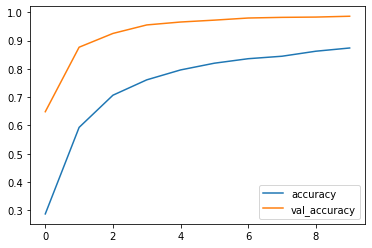

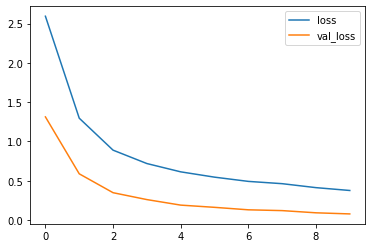

In [ ]:
evaluation = pd.DataFrame(model.history.history)
evaluation[['accuracy', 'val_accuracy']].plot()
evaluation[['loss', 'val_loss']].plot()

In [ ]:
test_path = 'traffic_sign_dataset/Test'
!rm traffic_sign_dataset/Test/GT-final_test.csv

In [ ]:
# Funcion para redimensionar imagenes
from PIL import Image

def scaling(test_images, test_path):
    images = []

    image_path = test_images
    
    for x in image_path:
        img = Image.open(test_path + '/' + x)
        img = img.resize((50,50))
        img = np.array(img)
        images.append(img)

    #Converting images into numpy array
    images = np.array(images)
    #The pixel value of each image ranges between 0 and 255
    #Dividing each image by 255 will scale the values between 0 and 1. This is also known as normalization.
    images = images/255

    return images

In [ ]:
# Redimensionamos las imagenes
test_images = scaling(sorted(os.listdir(test_path)),test_path)
test_images

array([[[[0.45098039, 0.54117647, 0.67843137],
         [0.45490196, 0.54117647, 0.6745098 ],
         [0.45490196, 0.5372549 , 0.6627451 ],
         ...,
         [0.34117647, 0.43529412, 0.53333333],
         [0.3254902 , 0.40784314, 0.50588235],
         [0.2627451 , 0.3372549 , 0.43137255]],

        [[0.4627451 , 0.56078431, 0.69803922],
         [0.45490196, 0.54901961, 0.69411765],
         [0.45098039, 0.54117647, 0.68235294],
         ...,
         [0.47058824, 0.55686275, 0.6745098 ],
         [0.47058824, 0.54509804, 0.65882353],
         [0.4627451 , 0.5372549 , 0.65490196]],

        [[0.45490196, 0.56078431, 0.69411765],
         [0.44313725, 0.54509804, 0.68235294],
         [0.45490196, 0.55294118, 0.68235294],
         ...,
         [0.4745098 , 0.55686275, 0.68627451],
         [0.47058824, 0.54901961, 0.67058824],
         [0.4745098 , 0.54901961, 0.67843137]],

        ...,

        [[0.45490196, 0.53333333, 0.65490196],
         [0.45882353, 0.53333333, 0.65098039]

In [ ]:
test = pd.read_csv('traffic_sign_dataset/Test.csv')
y_test = test['ClassId'].values
y_test

array([16,  1, 38, ...,  6,  7, 10])

In [ ]:
# TF 1.x
# y_pred = model.predict_classes(test_images);
# y_pred

# TF 2.x
predictions = model.predict(test_images)
y_pred = np.argmax(predictions, axis=1);
y_pred

array([16,  1, 38, ...,  3,  7, 10])

In [ ]:
# Nombre de cada uno de las 43 categorias
all_lables = ['Speed limit (20km/h)','Speed limit (30km/h)','Speed limit (50km/h)','Speed limit (60km/h)',
              'Speed limit (70km/h)','Speed limit (80km/h)','End of speed limit (80km/h)','Speed limit (100km/h)',
              'Speed limit (120km/h)','No passing','No passing for vechiles over 3.5 metric tons',
              'Right-of-way at the next intersection','Priority road','Yield','Stop','No vechiles',
              'Vechiles over 3.5 metric tons prohibited','No entry','General caution','Dangerous curve to the left',
              'Dangerous curve to the right','Double curve','Bumpy road','Slippery road','Road narrows on the right',
              'Road work','Traffic signals','Pedestrians','Children crossing','Bicycles crossing','Beware of ice/snow',
              'Wild animals crossing','End of all speed and passing limits','Turn right ahead','Turn left ahead',
              'Ahead only','Go straight or right','Go straight or left','Keep right','Keep left','Roundabout mandatory',
              'End of no passing','End of no passing by vechiles over 3.5 metric']

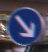

In [ ]:
# Probemos el modelo con esa imagen
img = Image.open(test_path + '/00002.png')
img

In [ ]:
# Categoria REAL (esperada)
print("Original label : ",all_lables[y_test[2]])

Original label :  Keep right


In [ ]:
# Categoria predecida (por nuestro modelo)
print("Predicted label : ",all_lables[y_pred[2]])

Predicted label :  Keep right
